In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt   
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error,r2_score,root_mean_squared_error

In [3]:
df = pd.read_csv('stud.csv')

In [4]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
949,female,group E,high school,free/reduced,completed,57,75,73
582,female,group D,bachelor's degree,free/reduced,none,63,73,78
672,female,group C,some college,standard,none,69,78,76
519,female,group B,high school,free/reduced,completed,67,78,79
682,male,group B,high school,standard,none,62,55,54


In [5]:
X = df.drop(columns='math_score')
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [6]:
y = df['math_score']

In [7]:
num_features = X.select_dtypes(exclude='object').columns
cat_features = X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

scale_trf = StandardScaler()
oh_trf = OneHotEncoder()

col_trf = ColumnTransformer([
    ('OneHotEncoder',oh_trf,cat_features),
    ("StandardScaler",scale_trf,num_features)
],remainder='passthrough')

In [8]:
X = col_trf.fit_transform(X)

In [9]:
X

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [10]:
X.shape

(1000, 19)

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
def evaluate_accuracy(actual,predicted):
    mse = mean_squared_error(actual,predicted)
    rmse = root_mean_squared_error(actual,predicted)
    r2_score_ = r2_score(actual,predicted)
    
    return mse,rmse,r2_score_

In [13]:
models = {
    'LinearRegression' : LinearRegression(),
    'Lasso' : Lasso(),
    'Ridge' : Ridge(),
    "KNeighbors Regressor" : KNeighborsRegressor(),
    "DecisionTree Regressor" : DecisionTreeRegressor(),
    "RandomForest Regressor" : RandomForestRegressor(),
    "XGB Regressor" : XGBRegressor(),
    "AdaBoost Regressor" : AdaBoostRegressor()
}

In [14]:
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    
    model.fit(X_train,y_train)
    
    y_pred = model.predict(X_test)
    
    test_mse , test_rmse , test_r2 = evaluate_accuracy(y_test,y_pred)
    
    model_list.append(list(models.keys())[i])
    
    print(list(models.keys())[i])
    print("Model Performance on Test set :")
    print("Root mean sq error : {}".format(test_rmse))
    print("Mean sq error : {}".format(test_mse))
    print("R2__score : {}".format(test_r2))
    
    
    r2_list.append(test_r2)
    
    print("------"*10)
    print('\n')
    

LinearRegression
Model Performance on Test set :
Root mean sq error : 5.557570799195732
Mean sq error : 30.886593188073082
R2__score : 0.8758630443016734
------------------------------------------------------------


Lasso
Model Performance on Test set :
Root mean sq error : 6.870524041050994
Mean sq error : 47.20410059865968
R2__score : 0.8102810073900305
------------------------------------------------------------


Ridge
Model Performance on Test set :
Root mean sq error : 5.556591731362334
Mean sq error : 30.875711669044268
R2__score : 0.8759067784434541
------------------------------------------------------------


KNeighbors Regressor
Model Performance on Test set :
Root mean sq error : 7.526778859512215
Mean sq error : 56.65240000000001
R2__score : 0.7723071487301632
------------------------------------------------------------


DecisionTree Regressor
Model Performance on Test set :
Root mean sq error : 8.220502823226003
Mean sq error : 67.57666666666667
R2__score : 0.7284011990

In [15]:
df1 = pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model_Name','R2_SCore']).sort_values(by=["R2_SCore"],ascending=False)
df1

,Model_Name,R2_SCore
2,Ridge,0.875907
0,LinearRegression,0.875863
5,RandomForest Regressor,0.845951
7,AdaBoost Regressor,0.839037
6,XGB Regressor,0.811816
1,Lasso,0.810281
3,KNeighbors Regressor,0.772307
4,DecisionTree Regressor,0.728401


**Linear Reg**

In [16]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred1 = lr.predict(X_test)

print("R2_score : ",r2_score(y_test,y_pred1)*100)

R2_score :  87.58630443016735


Text(0, 0.5, 'predicted')

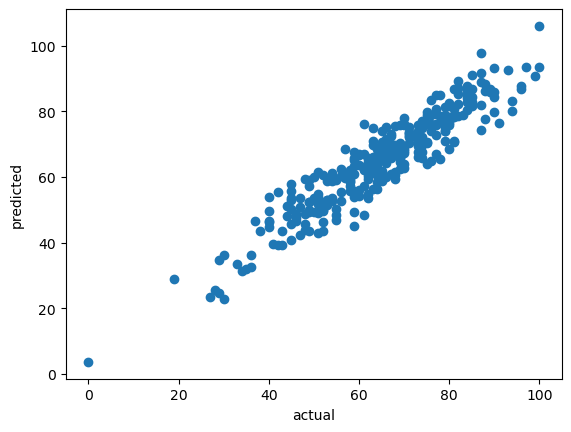

In [17]:
plt.scatter(y_test,y_pred1)
plt.xlabel('actual')
plt.ylabel('predicted')

<Axes: xlabel='math_score'>

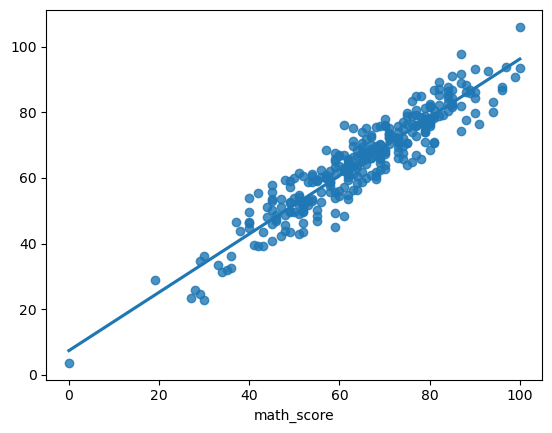

In [18]:
sns.regplot(x=y_test, y=y_pred1 ,ci=None,)